In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv(r"D:\datasets_9109_12699_german_credit_data.csv")

In [3]:
dataset


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
dataset.drop(["Purpose"],axis=1,inplace=True)

In [5]:
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,0,67,male,2,own,NaN,little,1169,6,good
1,1,22,female,2,own,little,moderate,5951,48,bad
2,2,49,male,1,own,little,NaN,2096,12,good
3,3,45,male,2,free,little,little,7882,42,good
4,4,53,male,2,free,little,little,4870,24,bad
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,good
996,996,40,male,3,own,little,little,3857,30,good
997,997,38,male,2,own,little,NaN,804,12,good
998,998,23,male,2,free,little,little,1845,45,bad


In [6]:
dataset.isnull().any()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Risk                False
dtype: bool

In [7]:
dataset['Saving accounts'].fillna(dataset['Saving accounts'].mode()[0],inplace = True)
dataset['Checking account'].fillna(dataset['Checking account'].mode()[0],inplace = True)

In [8]:
 dataset.isnull().any()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Risk                False
dtype: bool

In [9]:
dataset.drop(["Unnamed: 0"],axis=1,inplace=True)

In [10]:
dataset["Duration"].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [11]:
dataset["Sex"].unique()

array(['male', 'female'], dtype=object)

In [12]:
dataset["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [13]:
dataset["Saving accounts"].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [14]:
dataset["Checking account"].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [15]:
dataset["Risk"].unique()

array(['good', 'bad'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Sex"]=le.fit_transform(dataset["Sex"])
dataset["Housing"]=le.fit_transform(dataset["Housing"])
dataset["Saving accounts"]=le.fit_transform(dataset["Saving accounts"])
dataset["Checking account"]=le.fit_transform(dataset["Checking account"])
dataset["Risk"]=le.fit_transform(dataset["Risk"])

In [17]:
 dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,1
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,1
998,23,1,2,0,0,0,1845,45,0


In [18]:
dataset.corr()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
Age,1.000000,0.161694,0.015673,-0.301419,0.015772,-0.027176,0.032716,-0.036136,0.091127
Sex,0.161694,1.000000,0.070298,-0.219844,-0.014425,-0.012705,0.093482,0.081432,0.075493
Job,0.015673,0.070298,1.000000,-0.107191,-0.034596,-0.043277,0.285385,0.210910,-0.032735
Housing,-0.301419,-0.219844,-0.107191,1.000000,0.043324,-0.028196,-0.135632,-0.157049,-0.019315
Saving accounts,0.015772,-0.014425,-0.034596,0.043324,1.000000,0.015763,-0.077929,-0.043274,0.102751
Checking account,-0.027176,-0.012705,-0.043277,-0.028196,0.015763,1.000000,0.006953,0.004163,-0.052375
Credit amount,0.032716,0.093482,0.285385,-0.135632,-0.077929,0.006953,1.000000,0.624984,-0.154739
Duration,-0.036136,0.081432,0.210910,-0.157049,-0.043274,0.004163,0.624984,1.000000,-0.214927
Risk,0.091127,0.075493,-0.032735,-0.019315,0.102751,-0.052375,-0.154739,-0.214927,1.000000


In [19]:
x=dataset.iloc[:,0:8]
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,0,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,0,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45


In [20]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8:9].values

In [21]:
x

array([[  67,    1,    2, ...,    0, 1169,    6],
       [  22,    0,    2, ...,    1, 5951,   48],
       [  49,    1,    1, ...,    0, 2096,   12],
       ...,
       [  38,    1,    2, ...,    0,  804,   12],
       [  23,    1,    2, ...,    0, 1845,   45],
       [  27,    1,    2, ...,    1, 4576,   45]], dtype=int64)

In [22]:
x.shape #Total 8 cols in the input.

(1000, 8)

In [23]:
y.shape

(1000, 1)

In [24]:
#from sklearn.preprocessing import OneHotEncoder
#one = OneHotEncoder()

In [25]:
#z=one.fit_transform(x[:,1:2]).toarray()

In [26]:
#x=np.delete(x,[1],axis=1)
#x=np.concatenate((z,x),axis=1)

In [27]:
x.shape

(1000, 8)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [99]:
import pickle
pickle.dump(sc,open("scalar.pkl",'wb'))

In [100]:
x_train.shape

(800, 8)

In [101]:
x_test.shape

(200, 8)

In [102]:
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,1
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,1
998,23,1,2,0,0,0,1845,45,0


In [103]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=5,criterion="entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [104]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [105]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [106]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,dtcpred)
accuracy

0.585

In [107]:
from sklearn.metrics import confusion_matrix
dtcm=confusion_matrix(y_test,dtcpred)

In [108]:
dtcm

array([[20, 38],
       [45, 97]], dtype=int64)

In [109]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,dtcpred)
roc_auc=metrics.auc(fpr,tpr)

Text(0, 0.5, 'tpr')

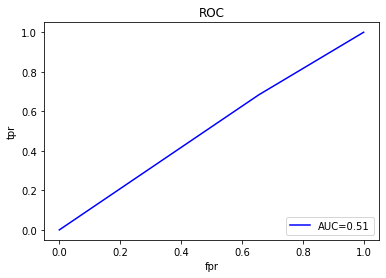

In [110]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,"blue",label="AUC=%.2f"%roc_auc)
plt.legend(loc="lower right")
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [111]:
dataset.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
5,35,1,1,0,0,0,9055,36,1
6,53,1,2,1,2,0,2835,24,1
7,35,1,3,2,0,1,6948,36,1
8,61,1,1,1,3,0,3059,12,1
9,28,1,3,1,0,1,5234,30,0


In [112]:
dtcr = dtc.predict(sc.fit_transform([[28,1,3,1,0,1,5234,30]]))

In [113]:
dtcr

array([0])

Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=5)
rfc.fit(x_train,y_train)

C:\Users\Aayesha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [115]:
rfcpred=rfc.predict(x_test)

In [116]:
rfcacc=accuracy_score(y_test,rfcpred)

In [117]:
rfcacc

0.7

In [118]:
rfccm=confusion_matrix(y_test,rfcpred)

In [119]:
rfccm

array([[ 16,  42],
       [ 18, 124]], dtype=int64)

In [120]:
import sklearn.metrics as metrics
rfcfpr, rfctpr,threshold=metrics.roc_curve(y_test,rfcpred)
rfcroc_auc=metrics.auc(rfcfpr,rfctpr)

Text(0.5, 0, 'tpr')

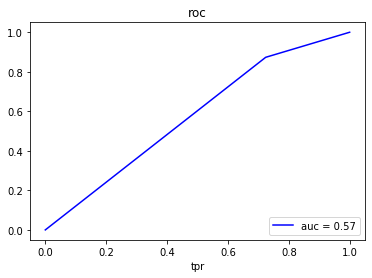

In [121]:
import matplotlib.pyplot as plt
plt.plot(rfcfpr,rfctpr,"b",label="auc = %0.2f"%rfcroc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.xlabel("tpr")

In [122]:
rfc_p = rfc.predict(sc.fit_transform([[28,1,3,1,0,1,5234,30]]))

In [123]:
rfc_p 
#Wrong Value

array([1])

Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
lsr =  LogisticRegression()
lsr.fit(x_train,y_train)

C:\Users\Aayesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
#import pickle
#pickle.dump(lsr,open("frisk.pkl",'wb'))


In [126]:
lrspred=lsr.predict(x_test)

In [127]:
lrspred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [128]:
lrsacc=accuracy_score(y_test,lrspred)

In [129]:
lrsacc

0.68

In [130]:

lrscm=confusion_matrix(y_test,lrspred)


In [131]:
lrscm

array([[  8,  50],
       [ 14, 128]], dtype=int64)

In [132]:
import sklearn.metrics as metrics
lrsfpr,lrstpr,threshold=metrics.roc_curve(y_test,lrspred)
lrsroc_auc=metrics.auc(lrsfpr,lrstpr)

Text(0.5, 0, 'tpr')

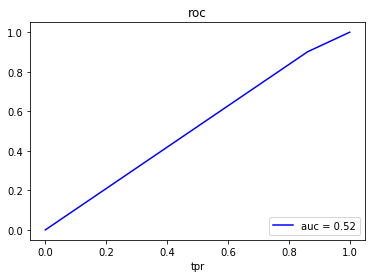

In [133]:
import matplotlib.pyplot as plt
plt.plot(lrsfpr,lrstpr,"b",label="auc = %0.2f"%lrsroc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.xlabel("tpr")

In [134]:
lrs_p= lsr.predict(sc.fit_transform([[3,1,0,1,5234,30]]))

ValueError: X has 6 features per sample; expecting 8

In [135]:
lrs_p
#Wrong Value

NameError: name 'lrs_p' is not defined

Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

C:\Users\Aayesha\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [137]:
nbpred=nb.predict(x_test)

In [138]:
nbpred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1])

In [139]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [140]:
from sklearn.metrics import accuracy_score
nbacc=accuracy_score(y_test,nbpred)

In [141]:
nbacc

0.695

In [142]:
from sklearn.metrics import confusion_matrix
navcm=confusion_matrix(y_test,nbpred)

In [143]:
navcm

array([[ 17,  41],
       [ 20, 122]], dtype=int64)

In [144]:
import sklearn.metrics as metrics
nbfpr,nbtpr,threshold=metrics.roc_curve(y_test,nbpred)
nbroc_auc=metrics.auc(nbfpr,nbtpr)

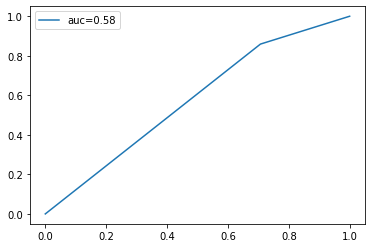

In [145]:
import matplotlib.pyplot as plt
plt.plot(nbfpr,nbtpr,label="auc=%0.2f"%nbroc_auc)
plt.legend()

In [146]:
nb_p= nb.predict(sc.fit_transform([[25,1,3,1,0,1,5234,30]]))

In [147]:
nb_p
#Wrong

array([1])

SVM

In [158]:
from sklearn.svm import SVC
svm=SVC(kernel="rbf",random_state=7)
svm.fit(x_train,y_train)

C:\Users\Aayesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [159]:
import pickle
pickle.dump(svm,open("svmrisk.pkl",'wb'))


In [160]:
svmpred=svm.predict(x_test)

In [161]:
svmpred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [162]:
svmacc=accuracy_score(y_test,svmpred)


In [163]:
svmacc

0.7

In [164]:
svm_p= svm.predict(sc.fit_transform([[50,0,3,1,0,1,5234,30]]))

In [165]:
svm_p

array([1])

In [166]:
import sklearn.metrics as metrics
svmfpr,svmtpr,threshold=metrics.roc_curve(y_test,svmpred)
svmroc_auc=metrics.auc(svmfpr,svmtpr)

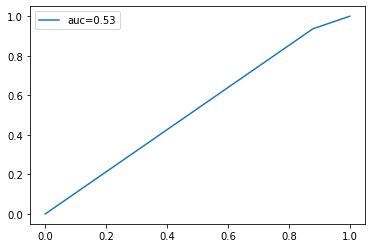

In [167]:
import matplotlib.pyplot as plt
plt.plot(svmfpr,svmtpr,label="auc=%0.2f"%svmroc_auc)
plt.legend()